In [2]:
import networkx as nx
from networkx import common_neighbors
from collections import OrderedDict
import matplotlib.pyplot as plt
from community import community_louvain
import matplotlib.cm as cm
import networkx.algorithms.community as nx_comm

In [3]:
G = nx.read_edgelist("Edges.txt")

In [4]:
part = community_louvain.best_partition(G)

In [5]:
communities = nx_comm.louvain_communities(G, seed=100)

In [7]:
print(len(communities))

95


In [8]:
import pandas as pd
import numpy as np
import numpy as np
from scipy.special import comb
from sklearn.preprocessing import MultiLabelBinarizer

In [9]:
Ground_Truth = pd.read_csv(r"/Users/fatmanoor/Desktop/Fatma_GSU/Spring_2023/Masters_Project/Fatma_MS_Project/Accuracy_louvain/7k_id_with_lineage.csv")
Ground_Truth.head()

,ID,lineage
0,1,B.1.1.7
1,2,B.1.1.7
2,3,D.2
3,4,B.1.617.2
4,5,B.1.429


In [10]:
New_dict = Ground_Truth.groupby('lineage')['ID'].apply(list)

In [11]:
Classes = []
keys_lin = []
items = New_dict.items()
for item in items:
    keys_lin.append(item[0]),Classes.append(item[1])
# printing keys and values separately
#print("keys : ", keys_lin)
#print("Clusters : ", Classes)

In [20]:
def c2l(c) :
    l = []
    j = 0
    for x in c :
        for y in x :
            l.append(j)
        j += 1
    return l


In [21]:
Ground_truth = c2l(Classes) 

In [25]:
Pred_Clusters = c2l(communities)

In [28]:
#print(communities)

AttributeError: 'list' object has no attribute 'dtype'

In [23]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import adjusted_rand_score

In [24]:
ari = adjusted_rand_score(Ground_truth, Pred_Clusters)
print("Adjusted Rand Index:", ari)

ValueError: Found input variables with inconsistent numbers of samples: [7000, 6403]

In [8]:
#print(communities)

In [16]:
#print(Clusters_flat)

In [7]:
#print(communities)

In [6]:
print(len(part))

6403


In [7]:
print(len(part.values()))

6403


In [8]:
#print(part)

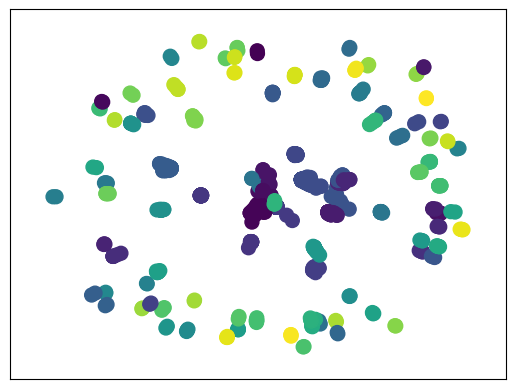

In [9]:
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(part.values()) + 1)
nx.draw_networkx_nodes(G, pos, part.keys(), node_size=100,
                       cmap=cmap, node_color=list(part.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()